# Homework 3 code

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider

## Question 1

In [2]:
def dynamics_q1(t, y, delta, beta):
    x1, x2 = y
    dx1dt = x2
    dx2dt = -np.sin(x1) - delta * x2 + beta
    
    return [dx1dt, dx2dt]

In [10]:
def plot_q1_dynamics(delta, beta):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    x1_range = np.linspace(-3*np.pi, 3*np.pi, 30)
    x2_range = np.linspace(-5, 5, 20)
    X1, X2 = np.meshgrid(x1_range, x2_range)
    
    DX1 = X2
    DX2 = -np.sin(X1) - delta * X2 + beta
    
    ax.streamplot(X1, X2, DX1, DX2, color='gray', density=1.2, linewidth=0.8, arrowsize=1.5)
    
    theta_grid = np.linspace(-3*np.pi, 3*np.pi, 200)
    omega_grid = np.linspace(-5, 5, 200)
    Theta, Omega = np.meshgrid(theta_grid, omega_grid)
    H = Omega**2 / 2 - np.cos(Theta) - beta * Theta
    
    ax.contour(Theta, Omega, H, levels=[0], colors='k', linewidths=2)
    
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'pink', 'cyan', 'magenta', 'yellow']
    x1_init_inside = np.linspace(-np.pi, np.pi, 4)
    x2_init_inside = np.linspace(-2, 2, 3)
    x1_init_outside = np.linspace(-2*np.pi, 2*np.pi, 3)
    x2_init_outside = np.concatenate([np.linspace(-5, -2.5, 2), np.linspace(2.5, 5, 2)])
    
    color_idx = 0
    for x1_0 in x1_init_inside:
        for x2_0 in x2_init_inside:
            sol = solve_ivp(dynamics_q1, [0, 50], [x1_0, x2_0], 
                           args=(delta, beta), dense_output=True, 
                           max_step=0.1)
            if sol.status == 0:
                color = colors[color_idx % len(colors)]
                ax.plot(sol.y[0], sol.y[1], color=color, alpha=0.7, linewidth=1.5)
                ax.plot(sol.y[0][0], sol.y[1][0], 'o', color=color, markersize=6)
                ax.plot(sol.y[0][-1], sol.y[1][-1], '^', color=color, markersize=6)
                color_idx += 1
    
    for x1_0 in x1_init_outside:
        for x2_0 in x2_init_outside:
            sol = solve_ivp(dynamics_q1, [0, 50], [x1_0, x2_0], 
                           args=(delta, beta), dense_output=True, 
                           max_step=0.1)
            if sol.status == 0:
                color = colors[color_idx % len(colors)]
                ax.plot(sol.y[0], sol.y[1], color=color, alpha=0.7, linewidth=1.5)
                ax.plot(sol.y[0][0], sol.y[1][0], 'o', color=color, markersize=6)
                ax.plot(sol.y[0][-1], sol.y[1][-1], '^', color=color, markersize=6)
                color_idx += 1
    
    ax.set_xlabel('$\\theta$', fontsize=12)
    ax.set_ylabel('$\\omega$', fontsize=12)
    ax.set_title(f'Phase Portrait (δ={delta:.2f}, β={beta:.2f})', fontsize=14)
    ax.set_xlim(-3*np.pi, 3*np.pi)
    ax.set_ylim(-5, 5)
    
    plt.tight_layout()
    plt.show()

interact(plot_q1_dynamics, 
         delta=FloatSlider(min=-3, max=3, step=0.1, value=0.5),
         beta=FloatSlider(min=-1, max=1, step=0.05, value=0))

interactive(children=(FloatSlider(value=0.5, description='delta', max=3.0, min=-3.0), FloatSlider(value=0.0, d…

<function __main__.plot_q1_dynamics(delta, beta)>

/newpage

## Question 3 — Part (d): Poincaré Map and Saddle-Type Periodic Orbit

We study the forced, damped pendulum

$$x'' + \delta\, x' + \sin(x) = \gamma \cos(\omega t)$$

with $\delta > 0$, $\gamma > 0$, $\omega = 1$. The Poincaré (stroboscopic) map $\Phi_T$ maps $(x(0), x'(0))$ to $(x(T), x'(T))$ with $T = 2\pi/\omega = 2\pi$.

The unforced ($\gamma=0$, $\delta=0$) system has a homoclinic orbit to the saddle $(\pi, 0)$:
$$x_h(t) = 4\arctan(e^t) - \pi, \qquad v_h(t) = 2\,\mathrm{sech}(t).$$

For $\delta, \gamma > 0$ the equilibrium $p_0 = (\pi, 0)$ perturbs to a $T$-periodic orbit of saddle type. We locate that orbit as a fixed point of $\Phi_T$ and compute its Floquet multipliers via the monodromy matrix.

In [12]:
# Parameters
delta = 0.1    # damping
gamma = 0.2    # forcing amplitude
omega = 1.0    # forcing frequency
T = 2 * np.pi / omega  # Poincaré period

print(f"δ = {delta}, γ = {gamma}, ω = {omega}, T = {T:.6f}")
print(f"exp(-δT) = {np.exp(-delta * T):.8f}")

δ = 0.1, γ = 0.2, ω = 1.0, T = 6.283185
exp(-δT) = 0.53348809


### Homoclinic orbit (unforced, undamped)

$$x_h(t) = 4\arctan(e^t) - \pi, \qquad v_h(t) = \frac{2}{\cosh(t)}$$

In [13]:
def x_h(t):
    """Homoclinic position."""
    return 4 * np.arctan(np.exp(t)) - np.pi

def v_h(t):
    """Homoclinic velocity."""
    return 2.0 / np.cosh(t)

def X_h(t0):
    """State on homoclinic at time t0."""
    return np.array([x_h(t0), v_h(t0)])

# Check: near the saddle (pi, 0) for large |t0|
for t0 in [-5, 5]:
    X = X_h(t0)
    print(f"X_h({t0:+d}) = ({X[0]:.6f}, {X[1]:.6f})  [cf. (π,0) = ({np.pi:.6f}, 0)]")

X_h(-5) = (-3.114641, 0.026951)  [cf. (π,0) = (3.141593, 0)]
X_h(+5) = (3.114641, 0.026951)  [cf. (π,0) = (3.141593, 0)]


### ODE right-hand side and integration wrapper

In [14]:
def rhs(t, X, delta, gamma, omega):
    """x'' + δ x' + sin(x) = γ cos(ω t)  →  2D first-order system."""
    x1, x2 = X
    return [x2, -delta * x2 - np.sin(x1) + gamma * np.cos(omega * t)]

def flow(X0, t_span, params, t_eval=None):
    """Integrate the ODE from t_span[0] to t_span[1]."""
    sol = solve_ivp(rhs, t_span, X0, args=params,
                    method='DOP853', rtol=1e-12, atol=1e-14,
                    dense_output=True, t_eval=t_eval, max_step=0.05)
    return sol

def poincare_map(X0, params):
    """Φ_T: integrate one period and return X(T)."""
    T_val = 2 * np.pi / params[2]  # params = (delta, gamma, omega)
    sol = flow(X0, [0, T_val], params)
    return sol.y[:, -1]

# Quick sanity check: the unforced saddle (π,0) should be nearly fixed
params_test = (0.0, 0.0, omega)
X_test = poincare_map(np.array([np.pi, 0.0]), params_test)
print(f"Φ_T(π,0) with δ=γ=0: ({X_test[0]:.10f}, {X_test[1]:.10f})")
print(f"  residual = {np.linalg.norm(X_test - [np.pi, 0]):.2e}")

Φ_T(π,0) with δ=γ=0: (3.1415926536, -0.0000000000)
  residual = 7.69e-16


### Find the fixed point of $\Phi_T$ near $(\pi, 0)$

We solve $F(X) = \Phi_T(X) - X = 0$ with an initial guess derived from the homoclinic orbit evaluated far from the saddle, plus a small perturbation in the direction of forcing.

In [16]:
from scipy.optimize import root, least_squares

params = (delta, gamma, omega)

def F(X):
    """Φ_T(X) - X  (should be zero at a fixed point)."""
    return poincare_map(X, params) - X

# Initial guess: use the linearized particular solution near (π, 0).
# Near the saddle, u = x - π satisfies  u'' + δu' - u = γ cos(ωt),
# whose T-periodic solution at t=0 gives u(0) ≈ γ/(-2 - δ²/2), u'(0) ≈ -δ/(2)*u(0).
A_lin = gamma / (-2 - delta**2 / 2)
B_lin = -delta * A_lin / 2
X_guess = np.array([np.pi + A_lin, B_lin])
print(f"Linearized guess: ({X_guess[0]:.6f}, {X_guess[1]:.6f})")

# Also try the homoclinic-based guess for comparison
X_guess_hom = X_h(5.0)
print(f"Homoclinic guess: ({X_guess_hom[0]:.6f}, {X_guess_hom[1]:.6f})")

# Solve with linearized guess (should stay near π)
sol_root = root(F, X_guess, method='hybr', tol=1e-12)
print(f"\nroot(hybr) success: {sol_root.success}")
print(f"  message: {sol_root.message}")

if sol_root.success:
    X_star = sol_root.x
else:
    # Fallback with homoclinic guess
    print("  → Trying with homoclinic guess...")
    sol_root = root(F, X_guess_hom, method='hybr', tol=1e-12)
    if sol_root.success:
        X_star = sol_root.x
    else:
        print("  → Trying least_squares fallback...")
        sol_ls = least_squares(F, X_guess, method='lm', xtol=1e-14, ftol=1e-14)
        X_star = sol_ls.x
        print(f"  least_squares cost = {sol_ls.cost:.2e}")

residual = np.linalg.norm(F(X_star))
print(f"\nFixed point X* = ({X_star[0]:.10f}, {X_star[1]:.10f})")
print(f"Residual ||Φ_T(X*) - X*|| = {residual:.2e}")
print(f"Distance from (π,0): {np.linalg.norm(X_star - [np.pi, 0]):.6f}")

Linearized guess: (3.041842, 0.004988)
Homoclinic guess: (3.114641, 0.026951)

root(hybr) success: True
  message: The solution converged.

Fixed point X* = (3.0417759711, 0.0049959773)
Residual ||Φ_T(X*) - X*|| = 2.41e-13
Distance from (π,0): 0.099942


### Monodromy matrix $D\Phi_T(X^*)$ and Floquet multipliers

We compute the Jacobian of the Poincaré map at the fixed point by finite differences (and also via the variational equations for comparison).

In [17]:
# --- (A) Finite-difference Jacobian ---
def dpoincare_fd(X_star, params, eps=1e-7):
    """Jacobian of Φ_T by central finite differences."""
    n = len(X_star)
    J = np.zeros((n, n))
    for i in range(n):
        e_i = np.zeros(n)
        e_i[i] = eps
        Phi_plus  = poincare_map(X_star + e_i, params)
        Phi_minus = poincare_map(X_star - e_i, params)
        J[:, i] = (Phi_plus - Phi_minus) / (2 * eps)
    return J

M_fd = dpoincare_fd(X_star, params)
evals_fd, evecs_fd = np.linalg.eig(M_fd)

print("=== Finite-difference monodromy matrix ===")
print(f"DΦ_T(X*) =\n{M_fd}\n")
print(f"Floquet multipliers: μ₁ = {evals_fd[0]:.8f}, μ₂ = {evals_fd[1]:.8f}")
print(f"|μ₁| = {abs(evals_fd[0]):.8f}, |μ₂| = {abs(evals_fd[1]):.8f}")
print(f"Product μ₁·μ₂ = {np.prod(evals_fd):.8f}")
print(f"exp(-δT)       = {np.exp(-delta * T):.8f}")
print(f"Saddle-type: one |μ|>1, one |μ|<1? → {(abs(evals_fd[0])>1) != (abs(evals_fd[1])>1)}")

=== Finite-difference monodromy matrix ===
DΦ_T(X*) =
[[205.36203873 195.68523852]
 [194.95286502 185.76915002]]

Floquet multipliers: μ₁ = 391.12982478, μ₂ = 0.00136397
|μ₁| = 391.12982478, |μ₂| = 0.00136397
Product μ₁·μ₂ = 0.53348773
exp(-δT)       = 0.53348809
Saddle-type: one |μ|>1, one |μ|<1? → True


In [18]:
# --- (B) Variational equations (monodromy via direct integration) ---
def rhs_var(t, Y, delta, gamma, omega):
    """Augmented system: state (x1,x2) + flattened 2x2 fundamental matrix Φ."""
    x1, x2 = Y[0], Y[1]
    Phi = Y[2:].reshape(2, 2)
    
    # State derivatives
    dx1 = x2
    dx2 = -delta * x2 - np.sin(x1) + gamma * np.cos(omega * t)
    
    # Jacobian of rhs w.r.t. state
    A = np.array([[0.0,    1.0],
                  [-np.cos(x1), -delta]])
    
    # Variational equation: dΦ/dt = A Φ
    dPhi = A @ Phi
    
    return np.concatenate([[dx1, dx2], dPhi.ravel()])

# Initial condition: state = X*, Φ(0) = I
Y0 = np.concatenate([X_star, np.eye(2).ravel()])
sol_var = solve_ivp(rhs_var, [0, T], Y0, args=params,
                    method='DOP853', rtol=1e-12, atol=1e-14, max_step=0.05)

M_var = sol_var.y[2:, -1].reshape(2, 2)
evals_var, evecs_var = np.linalg.eig(M_var)

print("=== Variational-equation monodromy matrix ===")
print(f"M =\n{M_var}\n")
print(f"Floquet multipliers: μ₁ = {evals_var[0]:.8f}, μ₂ = {evals_var[1]:.8f}")
print(f"|μ₁| = {abs(evals_var[0]):.8f}, |μ₂| = {abs(evals_var[1]):.8f}")
print(f"Product μ₁·μ₂ = {np.prod(evals_var):.8f}")
print(f"\nFinite-diff vs variational agreement: "
      f"||M_fd - M_var|| = {np.linalg.norm(M_fd - M_var):.2e}")

=== Variational-equation monodromy matrix ===
M =
[[205.36203921 195.68523864]
 [194.95286548 185.76915013]]

Floquet multipliers: μ₁ = 391.12982537, μ₂ = 0.00136397
|μ₁| = 391.12982537, |μ₂| = 0.00136397
Product μ₁·μ₂ = 0.53348809

Finite-diff vs variational agreement: ||M_fd - M_var|| = 6.81e-07


### Phase portrait: periodic orbit, homoclinic, and saddle

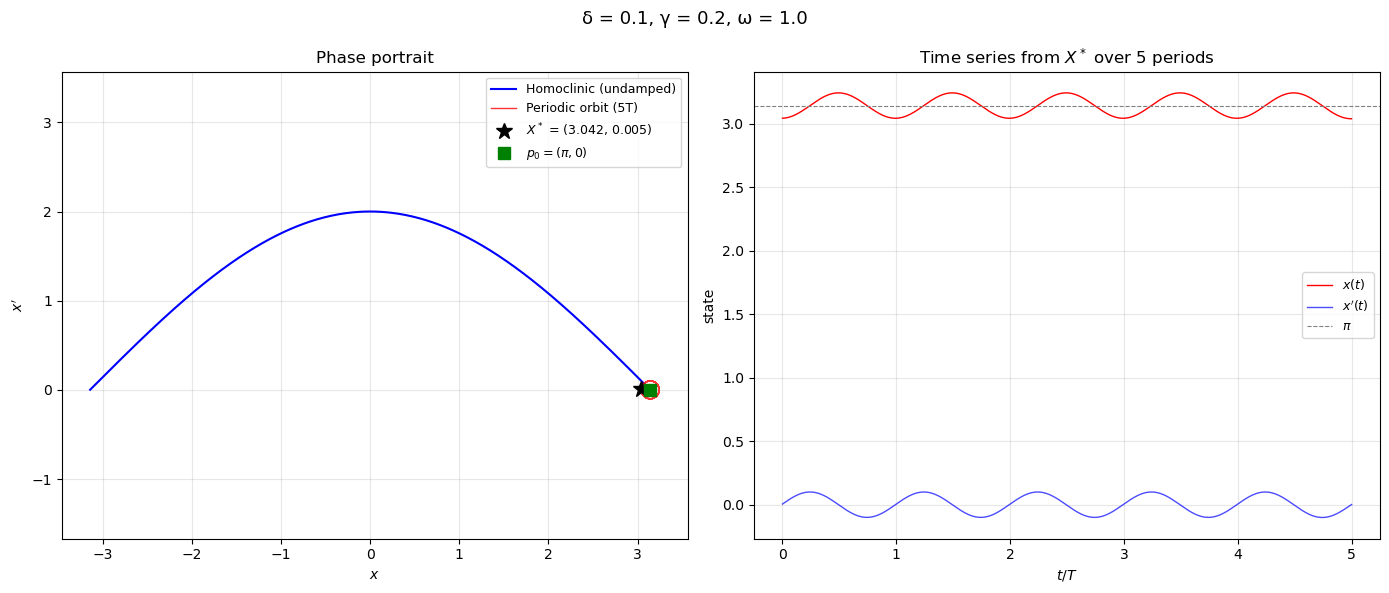

In [19]:
N_periods = 5
t_end = N_periods * T
sol_orbit = flow(X_star, [0, t_end], params,
                 t_eval=np.linspace(0, t_end, 5000))

# Homoclinic curve
t_hom = np.linspace(-8, 8, 2000)
x_hom = x_h(t_hom)
v_hom = v_h(t_hom)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Phase portrait ---
ax = axes[0]
ax.plot(x_hom, v_hom, 'b-', lw=1.5, label='Homoclinic (undamped)')
ax.plot(sol_orbit.y[0], sol_orbit.y[1], 'r-', lw=1.0, alpha=0.8,
        label=f'Periodic orbit ({N_periods}T)')
ax.plot(*X_star, 'k*', ms=12, zorder=5, label=f'$X^*$ = ({X_star[0]:.3f}, {X_star[1]:.3f})')
ax.plot(np.pi, 0, 'gs', ms=8, zorder=5, label='$p_0 = (\\pi, 0)$')
ax.set_xlabel('$x$')
ax.set_ylabel("$x'$")
ax.set_title('Phase portrait')
ax.legend(fontsize=9)
ax.set_aspect('equal', adjustable='datalim')
ax.grid(True, alpha=0.3)

# --- Time series ---
ax2 = axes[1]
ax2.plot(sol_orbit.t / T, sol_orbit.y[0], 'r-', lw=1.0, label="$x(t)$")
ax2.plot(sol_orbit.t / T, sol_orbit.y[1], 'b-', lw=1.0, alpha=0.7, label="$x'(t)$")
ax2.axhline(np.pi, color='gray', ls='--', lw=0.8, label='$\\pi$')
ax2.set_xlabel('$t / T$')
ax2.set_ylabel('state')
ax2.set_title(f'Time series from $X^*$ over {N_periods} periods')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

fig.suptitle(f'δ = {delta}, γ = {gamma}, ω = {omega}', fontsize=13)
plt.tight_layout()
plt.show()

### Stroboscopic map: check periodicity

Plot $\Phi_T^n(X^*)$ for several iterates to visually confirm it stays at the fixed point.

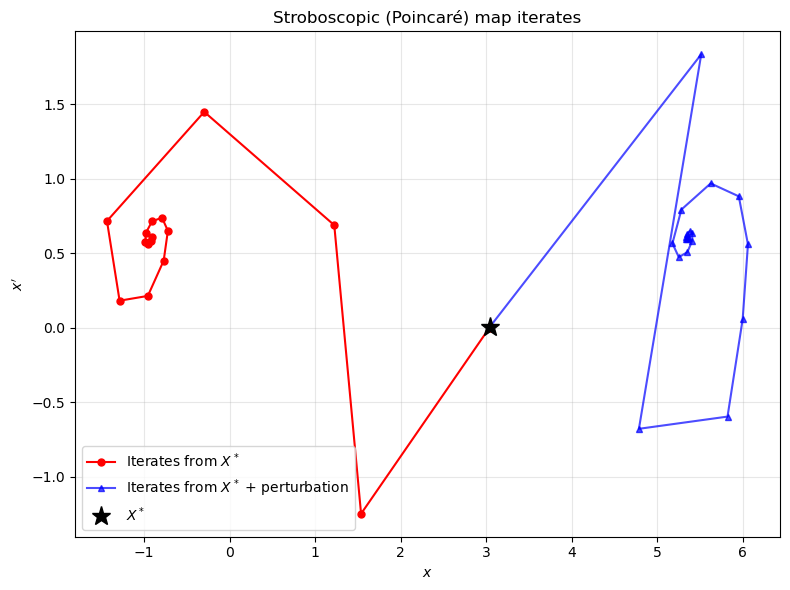

Max drift of X* iterates over 20 periods: 4.53e+00


In [20]:
# Iterate the Poincaré map starting from X* and nearby points
n_iter = 20

# From X* (should stay put)
X_iter = np.zeros((n_iter + 1, 2))
X_iter[0] = X_star
for k in range(n_iter):
    X_iter[k + 1] = poincare_map(X_iter[k], params)

# From a perturbed point (should diverge along unstable direction)
pert = 0.01 * evecs_fd[:, np.argmax(np.abs(evals_fd))].real
X_iter_p = np.zeros((n_iter + 1, 2))
X_iter_p[0] = X_star + pert
for k in range(n_iter):
    X_iter_p[k + 1] = poincare_map(X_iter_p[k], params)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X_iter[:, 0], X_iter[:, 1], 'ro-', ms=5, label='Iterates from $X^*$')
ax.plot(X_iter_p[:, 0], X_iter_p[:, 1], 'b^-', ms=4, alpha=0.7,
        label='Iterates from $X^*$ + perturbation')
ax.plot(*X_star, 'k*', ms=14, zorder=5, label='$X^*$')
ax.set_xlabel('$x$')
ax.set_ylabel("$x'$")
ax.set_title('Stroboscopic (Poincaré) map iterates')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Drift from fixed point
drifts = np.linalg.norm(X_iter - X_star, axis=1)
print(f"Max drift of X* iterates over {n_iter} periods: {drifts.max():.2e}")

/newpage

## Question 3 — Part (e): Stable and Unstable Manifolds of the Periodic Orbit

We compute the global stable and unstable manifolds of the saddle-type fixed point $X^*$ of the Poincaré map $\Phi_T$ by iterating small perturbations along the eigenvectors of the monodromy matrix.

In [21]:
# ── Part (e): reuse params and X* from Part (d) ──
# If kernel was restarted, re-run Part (d) cells first.
print(f"Using X* = ({X_star[0]:.8f}, {X_star[1]:.8f})")
print(f"Floquet multipliers: μ_u = {evals_fd[0]:.6f}, μ_s = {evals_fd[1]:.6f}")

# Identify stable / unstable eigenvectors
idx_u = np.argmax(np.abs(evals_fd))
idx_s = 1 - idx_u
mu_u, mu_s = evals_fd[idx_u].real, evals_fd[idx_s].real
v_u = evecs_fd[:, idx_u].real
v_s = evecs_fd[:, idx_s].real
# Normalize
v_u = v_u / np.linalg.norm(v_u)
v_s = v_s / np.linalg.norm(v_s)

print(f"\nUnstable: μ_u = {mu_u:.6f}, v_u = {v_u}")
print(f"Stable:   μ_s = {mu_s:.6f}, v_s = {v_s}")

Using X* = (3.04177597, 0.00499598)
Floquet multipliers: μ_u = 391.129825, μ_s = 0.001364

Unstable: μ_u = 391.129825, v_u = [0.72524588 0.68848995]
Stable:   μ_s = 0.001364, v_s = [-0.68984674  0.72395544]


In [22]:
def poincare_map_inv(X0, params):
    """Inverse Poincaré map: integrate from t=0 to t=-T (backward one period)."""
    T_val = 2 * np.pi / params[2]
    sol = solve_ivp(rhs, [0, -T_val], X0, args=params,
                    method='DOP853', rtol=1e-12, atol=1e-14, max_step=0.05)
    return sol.y[:, -1]

# Quick check: Φ_T^{-1}(Φ_T(X*)) ≈ X*
X_check = poincare_map_inv(poincare_map(X_star, params), params)
print(f"Φ_T^{{-1}}(Φ_T(X*)) - X* = {np.linalg.norm(X_check - X_star):.2e}")

Φ_T^{-1}(Φ_T(X*)) - X* = 7.56e-13


### Compute global unstable and stable manifolds by iteration

In [25]:
def grow_manifold(X_star, evec, map_fn, params, s0=5e-4, N_seeds=31,
                  M_iter=200, v_bound=50.0):
    """
    Grow a manifold branch by iterating map_fn on seeds X* ± s*evec.
    Returns list of arrays, one per seed, each shape (n_iter, 2).
    """
    seeds = np.linspace(-s0, s0, N_seeds)
    manifold = []
    for s in seeds:
        if s == 0:
            continue
        X = X_star + s * evec
        traj = [X.copy()]
        for _ in range(M_iter):
            try:
                X = map_fn(X, params)
            except Exception:
                break
            if np.abs(X[1]) > v_bound or not np.isfinite(X).all():
                break
            traj.append(X.copy())
        manifold.append(np.array(traj))
    return manifold

def grow_stable_manifold(X_star, v_s, params, s0=5e-4, N_seeds=41,
                         M_iter=80, v_bound=50.0):
    """
    Grow the stable manifold by integrating backward in time.
    Use smaller step count but denser seeds, and also use the forward
    Poincaré map approach: seeds along v_s, iterated backward (t → t-T).
    Additionally, grow by connecting the manifold arc via continuous
    backward integration over multiple periods.
    """
    # Method: integrate backward from X* + s*v_s for N_periods * T
    seeds = np.linspace(-s0, s0, N_seeds)
    manifold = []
    for s in seeds:
        if s == 0:
            continue
        X0_seed = X_star + s * v_s
        # Integrate backward for many periods, sample at each T
        T_val = 2 * np.pi / params[2]
        n_back = M_iter
        traj = [X0_seed.copy()]
        X = X0_seed.copy()
        for _ in range(n_back):
            try:
                sol = solve_ivp(rhs, [0, -T_val], X, args=params,
                                method='DOP853', rtol=1e-12, atol=1e-14,
                                max_step=0.1)
                X = sol.y[:, -1]
            except Exception:
                break
            if np.abs(X[1]) > v_bound or not np.isfinite(X).all():
                break
            traj.append(X.copy())
        manifold.append(np.array(traj))
    return manifold

print("Growing unstable manifold (forward iterates of Φ_T)...")
W_u = grow_manifold(X_star, v_u, poincare_map, params,
                    s0=5e-4, N_seeds=41, M_iter=150)
print(f"  {len(W_u)} branches, max length = {max(len(b) for b in W_u)}")

print("Growing stable manifold (backward iterates of Φ_T)...")
W_s = grow_stable_manifold(X_star, v_s, params,
                           s0=5e-4, N_seeds=41, M_iter=80)
print(f"  {len(W_s)} branches, max length = {max(len(b) for b in W_s)}")

Growing unstable manifold (forward iterates of Φ_T)...
  40 branches, max length = 151
Growing stable manifold (backward iterates of Φ_T)...
  40 branches, max length = 8


### Phase-plane plot of manifolds

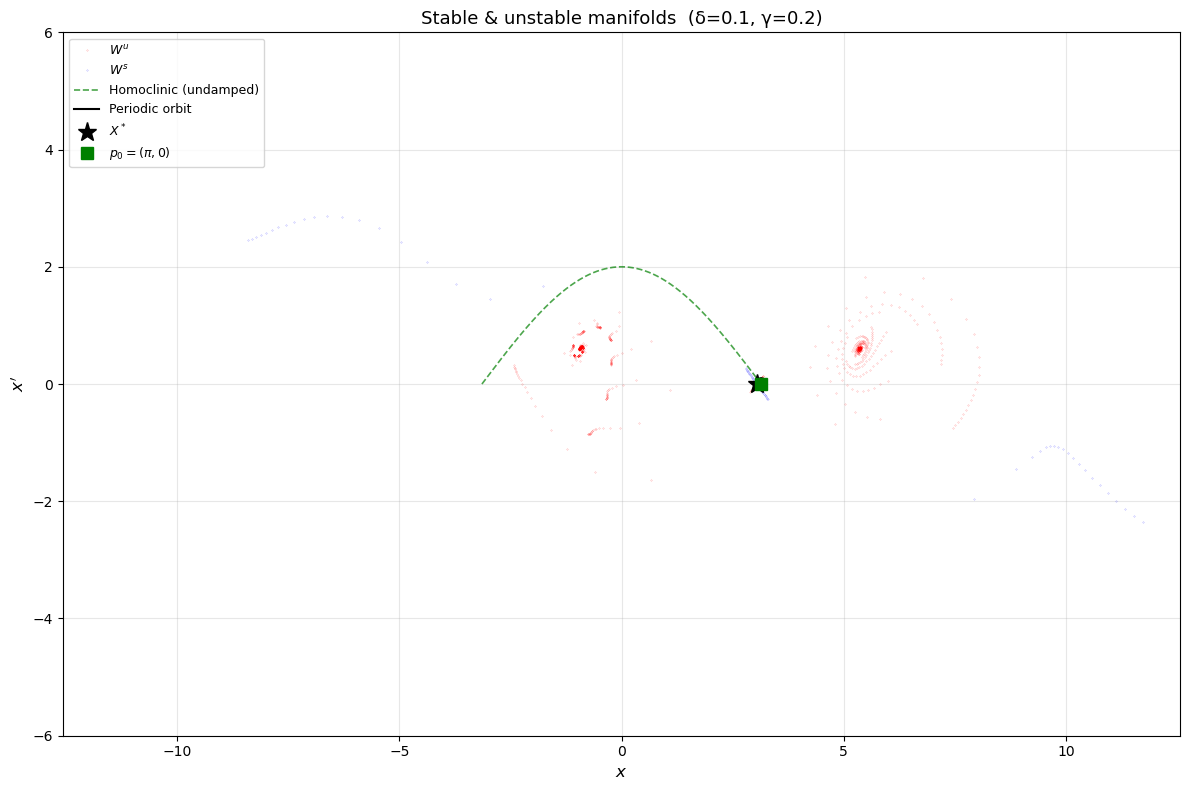

In [26]:
import os
os.makedirs("notebooks/figs", exist_ok=True)

# Homoclinic reference curve
t_hom = np.linspace(-10, 10, 4000)
xh = 4 * np.arctan(np.exp(t_hom)) - np.pi
vh = 2.0 / np.cosh(t_hom)

fig, ax = plt.subplots(figsize=(12, 8))

# Unstable manifold (red)
for i, traj in enumerate(W_u):
    ax.plot(traj[:, 0], traj[:, 1], 'r.', ms=0.4, alpha=0.5,
            label='$W^u$' if i == 0 else None)

# Stable manifold (blue)
for i, traj in enumerate(W_s):
    ax.plot(traj[:, 0], traj[:, 1], 'b.', ms=0.4, alpha=0.5,
            label='$W^s$' if i == 0 else None)

# Homoclinic (dashed green)
ax.plot(xh, vh, 'g--', lw=1.2, alpha=0.7, label='Homoclinic (undamped)')

# Periodic orbit over one period (thick)
sol_po = flow(X_star, [0, T], params, t_eval=np.linspace(0, T, 500))
ax.plot(sol_po.y[0], sol_po.y[1], 'k-', lw=1.5, label='Periodic orbit')

# Fixed points
ax.plot(*X_star, 'k*', ms=14, zorder=5, label=f'$X^*$')
ax.plot(np.pi, 0, 'gs', ms=8, zorder=5, label='$p_0=(\\pi,0)$')

ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel("$x'$", fontsize=12)
ax.set_title(f'Stable & unstable manifolds  (δ={delta}, γ={gamma})', fontsize=13)
ax.legend(fontsize=9, loc='upper left')
ax.set_xlim(-4*np.pi, 4*np.pi)
ax.set_ylim(-6, 6)
ax.grid(True, alpha=0.3)
plt.tight_layout()
fig.savefig("notebooks/figs/manifolds_full.png", dpi=150)
plt.show()

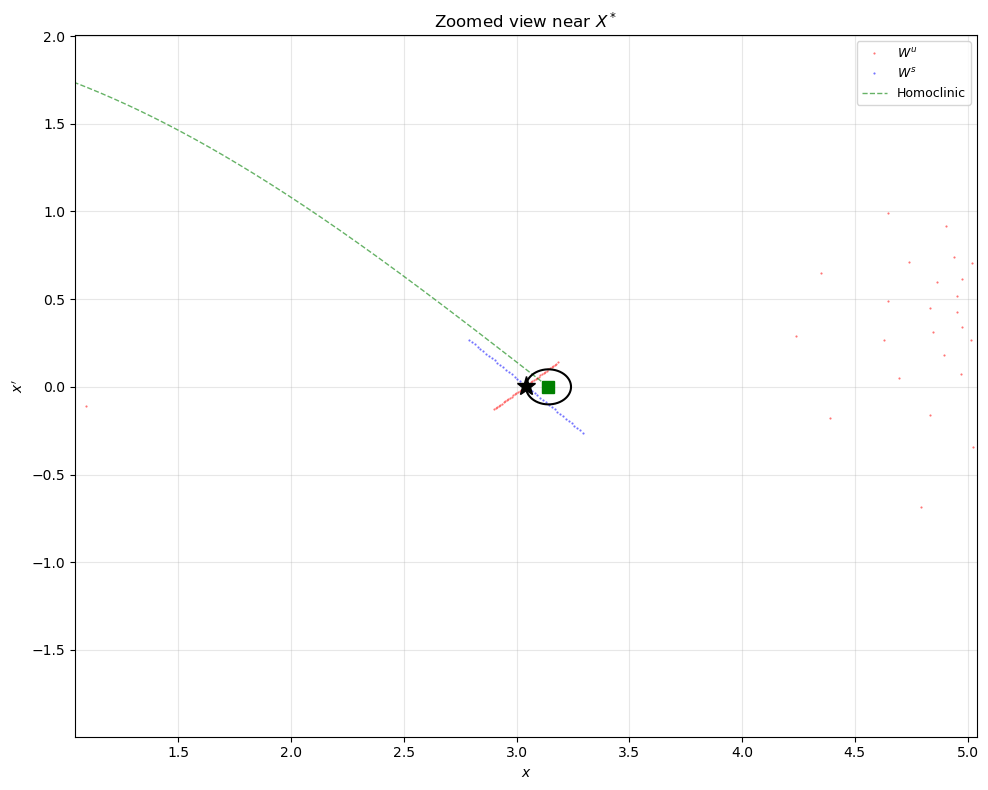

In [27]:
# Zoomed view near X*
fig, ax = plt.subplots(figsize=(10, 8))

for i, traj in enumerate(W_u):
    ax.plot(traj[:, 0], traj[:, 1], 'r.', ms=1.0, alpha=0.6,
            label='$W^u$' if i == 0 else None)
for i, traj in enumerate(W_s):
    ax.plot(traj[:, 0], traj[:, 1], 'b.', ms=1.0, alpha=0.6,
            label='$W^s$' if i == 0 else None)

ax.plot(xh, vh, 'g--', lw=1.0, alpha=0.6, label='Homoclinic')
ax.plot(sol_po.y[0], sol_po.y[1], 'k-', lw=1.5)
ax.plot(*X_star, 'k*', ms=14, zorder=5)
ax.plot(np.pi, 0, 'gs', ms=8, zorder=5)

zoom = 2.0
ax.set_xlim(X_star[0] - zoom, X_star[0] + zoom)
ax.set_ylim(X_star[1] - zoom, X_star[1] + zoom)
ax.set_xlabel('$x$')
ax.set_ylabel("$x'$")
ax.set_title('Zoomed view near $X^*$')
ax.legend(fontsize=9)
ax.grid(True, alpha=0.3)
plt.tight_layout()
fig.savefig("notebooks/figs/manifolds_zoom.png", dpi=150)
plt.show()

### Transversal intersection detection

In [29]:
from scipy.spatial import cKDTree

# Collect all manifold points
pts_u = np.vstack(W_u)
pts_s = np.vstack(W_s)
print(f"Unstable manifold points: {len(pts_u)}")
print(f"Stable manifold points:   {len(pts_s)}")

# Exclude points very close to X* (those are just the seeds, not global intersections)
excl_radius = 0.02
mask_u = np.linalg.norm(pts_u - X_star, axis=1) > excl_radius
mask_s = np.linalg.norm(pts_s - X_star, axis=1) > excl_radius
pts_u_far = pts_u[mask_u]
pts_s_far = pts_s[mask_s]
print(f"After excluding r < {excl_radius} from X*: W^u = {len(pts_u_far)}, W^s = {len(pts_s_far)}")

if len(pts_s_far) == 0 or len(pts_u_far) == 0:
    print("\nInsufficient manifold coverage for global intersection detection.")
    n_close = 0
    candidates = []
else:
    tree_s = cKDTree(pts_s_far)
    dist_tol = 0.05
    dists, idxs = tree_s.query(pts_u_far, k=1)
    close_mask = dists < dist_tol
    n_close = close_mask.sum()
    print(f"\nClose approaches (dist < {dist_tol}): {n_close}")

    # Tangent estimation
    def tangent_at(manifold_list, global_idx):
        offset = 0
        for branch in manifold_list:
            n = len(branch)
            if global_idx < offset + n:
                local = global_idx - offset
                if local > 0 and local < n - 1:
                    t = branch[local + 1] - branch[local - 1]
                elif local > 0:
                    t = branch[local] - branch[local - 1]
                elif n > 1:
                    t = branch[local + 1] - branch[local]
                else:
                    return np.array([1.0, 0.0])
                nm = np.linalg.norm(t)
                return t / nm if nm > 1e-15 else np.array([1.0, 0.0])
            offset += n
        return np.array([1.0, 0.0])

    det_tol = 1e-3
    candidates = []
    # Map indices back to global arrays for tangent computation
    u_global_idx = np.where(mask_u)[0]
    s_global_idx = np.where(mask_s)[0]
    close_indices = np.where(close_mask)[0]
    for ci in close_indices:
        ui = u_global_idx[ci]
        si = s_global_idx[idxs[ci]]
        t_u = tangent_at(W_u, ui)
        t_s = tangent_at(W_s, si)
        det_val = abs(t_u[0] * t_s[1] - t_u[1] * t_s[0])
        if det_val > det_tol:
            candidates.append((pts_u[ui], pts_s[si], dists[ci], det_val))

    print(f"Transversal candidates (|det| > {det_tol}): {len(candidates)}")
    if candidates:
        print(f"\n{'#':>3}  {'x_u':>10}  {'v_u':>10}  {'x_s':>10}  {'v_s':>10}  {'dist':>10}  {'|det|':>10}")
        for i, (pu, ps, d, det) in enumerate(candidates[:15]):
            print(f"{i:3d}  {pu[0]:10.4f}  {pu[1]:10.4f}  {ps[0]:10.4f}  {ps[1]:10.4f}  {d:10.2e}  {det:10.4f}")
    else:
        print("No transversal intersections found at this resolution.")

Unstable manifold points: 6040
Stable manifold points:   303
After excluding r < 0.02 from X*: W^u = 5996, W^s = 261

Close approaches (dist < 0.05): 2
Transversal candidates (|det| > 0.001): 2

  #         x_u         v_u         x_s         v_s        dist       |det|
  0      3.0205     -0.0152      3.0165      0.0315    4.69e-02      0.4699
  1      3.0631      0.0252      3.0671     -0.0216    4.69e-02      0.5336


### Melnikov criterion and parameter sweep

In [30]:
# Analytic Melnikov criterion for transversal intersection:
#   γ/δ > (4/π) cosh(πω/2)
RHS_crit = (4.0 / np.pi) * np.cosh(np.pi * omega / 2)
print(f"Melnikov criterion: γ/δ > {RHS_crit:.6f}")
print(f"Current γ/δ = {gamma/delta:.6f}  →  {'ABOVE' if gamma/delta > RHS_crit else 'BELOW'} threshold\n")

# Parameter sweep
delta_vals = np.array([0.02, 0.05, 0.1, 0.2, 0.35, 0.5])
gamma_vals = np.array([0.05, 0.1, 0.2, 0.4, 0.7, 1.0])

print(f"{'δ':>6} {'γ':>6} {'γ/δ':>8} {'RHS':>8} {'Above?':>7} {'X* found':>9} {'Intersections':>14}")
print("-" * 70)

sweep_results = []
for d in delta_vals:
    for g in gamma_vals:
        ratio = g / d
        above = ratio > RHS_crit
        p = (d, g, omega)
        
        # Only compute for cases above criterion (to keep it fast)
        if not above:
            print(f"{d:6.2f} {g:6.2f} {ratio:8.2f} {RHS_crit:8.4f} {'Yes' if above else 'No':>7} {'--':>9} {'--':>14}")
            continue
        
        # Find fixed point
        A_g = g / (-2 - d**2 / 2)
        B_g = -d * A_g / 2
        X0_g = np.array([np.pi + A_g, B_g])
        try:
            sol = root(F.__wrapped__ if hasattr(F, '__wrapped__') else
                       lambda X: poincare_map(X, p) - X,
                       X0_g, method='hybr', tol=1e-10)
            if not sol.success:
                sol = least_squares(lambda X: poincare_map(X, p) - X,
                                    X0_g, method='lm')
            Xs = sol.x
            res = np.linalg.norm(poincare_map(Xs, p) - Xs)
            found = res < 1e-6
        except Exception:
            found = False
            Xs = None
            res = np.inf
        
        n_int = 0
        if found:
            # Quick manifold computation (reduced)
            Jac = dpoincare_fd(Xs, p)
            ev, evc = np.linalg.eig(Jac)
            iu = np.argmax(np.abs(ev))
            i_s = 1 - iu
            vu = evc[:, iu].real; vu /= np.linalg.norm(vu)
            vs = evc[:, i_s].real; vs /= np.linalg.norm(vs)
            
            Wu = grow_manifold(Xs, vu, lambda X, p=p: poincare_map(X, p), p,
                               s0=5e-4, N_seeds=11, M_iter=60)
            Ws = grow_manifold(Xs, vs, lambda X, p=p: poincare_map_inv(X, p), p,
                               s0=5e-4, N_seeds=11, M_iter=60)
            
            pu = np.vstack(Wu)
            ps_pts = np.vstack(Ws)
            if len(ps_pts) > 0 and len(pu) > 0:
                tree = cKDTree(ps_pts)
                dd, ii = tree.query(pu, k=1)
                n_int = (dd < 0.05).sum()
        
        sweep_results.append((d, g, above, found, n_int))
        print(f"{d:6.2f} {g:6.2f} {ratio:8.2f} {RHS_crit:8.4f} {'Yes':>7} "
              f"{'Yes' if found else 'No':>9} {n_int:>14}")

Melnikov criterion: γ/δ > 3.194785
Current γ/δ = 2.000000  →  BELOW threshold

     δ      γ      γ/δ      RHS  Above?  X* found  Intersections
----------------------------------------------------------------------
  0.02   0.05     2.50   3.1948      No        --             --
  0.02   0.10     5.00   3.1948     Yes       Yes             10
  0.02   0.20    10.00   3.1948     Yes       Yes             12
  0.02   0.40    20.00   3.1948     Yes       Yes             12
  0.02   0.70    35.00   3.1948     Yes       Yes             13
  0.02   1.00    50.00   3.1948     Yes       Yes             12
  0.05   0.05     1.00   3.1948      No        --             --
  0.05   0.10     2.00   3.1948      No        --             --
  0.05   0.20     4.00   3.1948     Yes       Yes             12
  0.05   0.40     8.00   3.1948     Yes       Yes             12
  0.05   0.70    14.00   3.1948     Yes       Yes             17
  0.05   1.00    20.00   3.1948     Yes       Yes             13
  0.1